#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Procesamiento de Lenguaje Natural (NLP)**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad Semanas 03 y 04**

###**Pre-procesamiento, Matrices Documeto-Término (DTM) y TF-IDF.**

#### 📅 **12 de mayo de 2025**

**A01795941 :** Juan Carlos Pérez Nava

En esta actividad deberás utilizar los datos de tres archivos que se encuentran en Canvas:

*   **amazon_cells_labelled.txt** Contiene 1000 registros de comentarios de usuarios que adquirieron un producto a través de la plataforma de Amazon.

*   **imdb_labelled.txt** Contiene 1000 registros de comentarios que dejaron usuarios sobre palículas y series en la plataforma de IMBD.

*   **yelp_labelled.txt** Contiene 1000 comentarios de usuarios sobre servicios de comida dejados en la plataforma de Yelp.

Igualmente son los archivos que encuentras en el Machine Learning Repository de la UCI, llamado "Sentiment Labelled Sentences": https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#



In [201]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re
import string

import gdown
import os
import matplotlib.pyplot as plt

Se crea una carpeta de datos para almacenar los archivos necesarios para la actividad. Estos archivos fueron previamente guardados en Google Drive, y se generó una URL para descargar el recurso compartido.

In [202]:
output_directory = 'datos'
if not os.path.exists(output_directory):
    os.makedirs(output_directory, exist_ok=True)
    print(f"Directorio '{output_directory}' creado exitosamente.")
else:
    print(f"El directorio '{output_directory}' ya existe. No es necesario crearlo.")

datos_acl   = 'https://drive.google.com/uc?id=1Fu4fxJYr-WpsXfdjm0U0beMNIf0XC8OX'
datos_imdb  = 'https://drive.google.com/uc?id=10gWP68AIuqI2hnWiELY9__oDzKVChSHr'
datos_yelp  = 'https://drive.google.com/uc?id=1-L3fkdDiX6gqwRa-9ANV1Hoyvk7T_8qV'
output_file = os.path.join(output_directory, 'amazon_cells_labelled.txt')

print("Iniciando la descarga de datos desde la URL proporcionada...")
try:
    gdown.download(datos_acl, os.path.join(output_directory, 'amazon_cells_labelled.txt'), quiet=False)
    gdown.download(datos_imdb, os.path.join(output_directory, 'imdb_labelled.txt'), quiet=False)
    gdown.download(datos_yelp, os.path.join(output_directory, 'yelp_labelled.txt'), quiet=False)
    print(f"\nDescarga completada. El archivo ha sido guardado en '{output_file}'.")
except Exception as e:
    print(f"Ocurrió un error durante la descarga: {e}")



El directorio 'datos' ya existe. No es necesario crearlo.
Iniciando la descarga de datos desde la URL proporcionada...


Downloading...
From: https://drive.google.com/uc?id=1Fu4fxJYr-WpsXfdjm0U0beMNIf0XC8OX
To: /content/datos/amazon_cells_labelled.txt
100%|██████████| 58.2k/58.2k [00:00<00:00, 3.29MB/s]
Downloading...
From: https://drive.google.com/uc?id=10gWP68AIuqI2hnWiELY9__oDzKVChSHr
To: /content/datos/imdb_labelled.txt
100%|██████████| 85.3k/85.3k [00:00<00:00, 2.54MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-L3fkdDiX6gqwRa-9ANV1Hoyvk7T_8qV
To: /content/datos/yelp_labelled.txt
100%|██████████| 61.3k/61.3k [00:00<00:00, 2.68MB/s]


Descarga completada. El archivo ha sido guardado en 'datos/amazon_cells_labelled.txt'.


* `nltk.download('punkt_tab')` - Descarga el modelo de tokenización "**punkt_tab**", que ayuda a dividir el texto en oraciones o palabras. Es un modelo no supervisado que identifica límites de enunciados en distintos idiomas
* `nltk.download('stopwords')` - Descarga una colección de palabras vacías **stopwords**. Las stopwords son términos comunes en un idioma que suelen eliminarse debido a que no aportan mucho significado al análisis de texto
* `nltk.download('wordnet')` - Esta función descarga el corpus de **WordNet**, un diccionario semántico en inglés que permite obtener relaciones entre palabras, como sinónimos, hiperónimos e hipónimos.

In [203]:
nltk.download('punkt_tab')    # es un tokenizador que ayuda a dividr el texto en enunciados mediante un modelo no-supervisado.
nltk.download('stopwords')    # para tener acceso a "stopwords" en varios idiomas.
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [204]:
# Veamos la lista de stopwords que se incluyen de manera predeterminada la suite de librerías de NLTK:
print(len(stopwords.words('english')))
print(stopwords.words('english'))

198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 

In [205]:
# Consideremos la siguiente lista de palabras asociada a negaciones en inglés:
negwords = [ 'no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

##**Pregunta - 1:**




Excluye todas las palabras de la lista "negwords" de la lista predeterminada de "stopwords", para definir un nuevo conjunto llamado **mystopwords**, con el cual trabajaremos en esta Actividad:


In [206]:
################################################################################
# AGREGA AQUÍ TU LÍNEA O LÍNEAS DE CÓDIGO - Pregunta 1:
mystopwords = [word for word in stopwords.words('english') if word not in negwords]

print(f"El conjunto original de stopwords consta de \033[32m\033[1m{len(stopwords.words('english'))}\033[0m palabras,")
print(f"mientras que negwords incluye \033[32m\033[1m{len(negwords)}\033[0m términos.")
print(f"Tras la filtración, el nuevo conjunto mystopwords contiene un total de \033[32m\033[1m{len(mystopwords)}\033[0m palabras.")

# FIN PARA AGREGAR TU LÍNEA O LÍNEAS DE CÓDIGO.
################################################################################

print(len(mystopwords))
print(mystopwords)

El conjunto original de stopwords consta de 198 palabras,
mientras que negwords incluye 40 términos.
Tras la filtración, el nuevo conjunto mystopwords contiene un total de 158 palabras.
158
['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'd', 'did', 'do', 'does', 'doing', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'has', 'have', 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'more', 'most', 'my', 'myself', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'she', "she'd", "she'll", "she's", 'should', "should've", 'so', 'some', 'such', 't', 't

###**Cargamos los datos de Amazon**

In [207]:
# Puedes modificar en dado caso la ruta de los archivos:

dfa = pd.read_csv(os.path.join(output_directory, 'amazon_cells_labelled.txt'), sep='\t', names=['review','label'], header=None, encoding='utf-8')
dfi = pd.read_csv(os.path.join(output_directory, 'imdb_labelled.txt'), delimiter='\t', names=['review','label'], header=None, encoding='utf-8')
dfy = pd.read_csv(os.path.join(output_directory, 'yelp_labelled.txt'), sep='\t', names=['review','label'], header=None, encoding='utf-8')


print('Total de registros de Amazon:',dfa.shape)
print('Total de registros de IMBD:',dfi.shape)
print('Total de registros de Yelp:',dfy.shape)

Total de registros de Amazon: (1000, 2)
Total de registros de IMBD: (748, 2)
Total de registros de Yelp: (1000, 2)


La salida anterior esperada es la siguiente:

Total de registros de Amazon: (1000, 2)

Total de registros de IMBD: (748, 2)

Total de registros de Yelp: (1000, 2)

In [208]:
dfa.head()     # Cada uno de estos data frame está formado de dos columnas,
               # uno con los comentarios (review) y otro con la etiqueta (label).
               # En particular aquí mostramos en el Amazon:

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


Sin embargo, observa que los registros de IMBD no son los 1000 que se indican en la documentación de estos datos, sino 748.

En realidad no son datos perdidos, sino que varios de ellos fueron capturados errónamente como uno solo. En ocasiones, la gran cantidad de caracteres especiales existentes en la actualidad generan este tipo de problemas.

Por ejemplo, observa la salida siguiente y cómo el registro de índice 19 tiene una gran cantidad de registros conjuntados como uno solo. Es decir, se conjuntó indebidamente información de las dos columnas del data frame.



In [209]:
dfi.values.tolist()[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
  1],
 [' The structure of this film is easily the most tightly constructed in the history of cinema.  \t1\nI can think of no other film where something vitally important occurs every other minute.  \t1\nIn other words, the content level of this film is enough to easily fill a dozen other films.  \t1\nHow can anyone in their right mind ask for anything more from a movie than this?  \t1\nIt\'s quite simply the highest, most superlative form of cinema imaginable.  \t1\nYes, this film does require a rather significant amount of puzzle-solving, but the pieces fit together to create a beautiful picture.  \t1\nThis short film certainly pulls no punches.  \t0\nGraphics is far from the best part of the game.  \t0\nThis is

Además, se observa que cada comentario (review) debe estar separado de su evaluación (label) por un tabulador "\t" y después separado del siguiente registro por un salto de línea "\n".

Usaremos esta información para separar de manera adecuada estos registros del conjunto de IMBD.

##**Pregunta - 2:**

En este ejercicio deberás corregir este problema que tienen los comentarios de IMBD, del cual se registran 748 comentarios, cuando deben ser 1000.

Como cada data frame tiene 2 columnas, el comentario y la evaluación, en algunas ocasiones el valor numérico de la evaluación se toma como parte del comentario y esto empieza a generar dichos errores.

El problema se puede intentar resolver de varias formas, sin embargo puedes al menos seguir los siguientes pasos para obtener de nuevo los 1000 comentarios en IMBD:


1.   Conjuntar en un solo string cada comentario (review) con su evaluación (label), separados por un tabulador "\t". Toma en cuenta que ambos deben ser del tipo de dato string.

2.   Separa cada uno de estos string con el método split() y con respecto al salto de línea "\n". Esto te debe llevar a que cada registro es ahora una lista con un solo string que contiene el comenario (review), seguido del tabulador y de la etiqueta (label). O bien, tienes una lista de varios string, donde cada string es un review, seguido por el tabulador y su label.

3.   Ahora separa cada cada uno de los string del paso anterior con respecto al tabulador "\t", para ya tener separados ahora sí, todos los comentarios (review) de su evaluación (label).

4.   Agrega cada uno de estos nuevos comentarios (review) y etiquetas (label) a la nueva lista que llamamos "newdfi".

El número de elementos de la nueva lista "newdfi" debe de ser de 1000, donde cada elemento está formado a su vez por una lista de dos elementos, donde el primero es un string del comentario (review) y el segundo es un número entero de la etiqueta (label).

Básicamente la idea fue conjuntar de nuevo la información de ambas columnas, para separarlas de nuevo de la manera adecuada.






In [210]:
tmpdfi = dfi.values.tolist()     # lista con los 748 registros.
newdfi=[]     # lista de salida que deberá tener los 1000 registros ya debidamente separados.

################################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 2:

dfi_concat = '\n'.join(['\t'.join(map(str, row)) for row in tmpdfi])
dfi_concat_etiquetas = dfi_concat.split('\n')

for comentario in dfi_concat_etiquetas:
    review, label = comentario.split('\t')
    newdfi.append([review, int(label)])

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
################################################################################

print('La nueva lista tiene 1000 elementos:', (len(newdfi)==1000))

La nueva lista tiene 1000 elementos: True


In [211]:
# Verificando los registros donde habíamos detectado uno de los problemas:
newdfi[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
  1],
 [' The structure of this film is easily the most tightly constructed in the history of cinema.  ',
  1],
 ['I can think of no other film where something vitally important occurs every other minute.  ',
  1]]

En particular la salida anterior debe ser algo como lo siguiente:

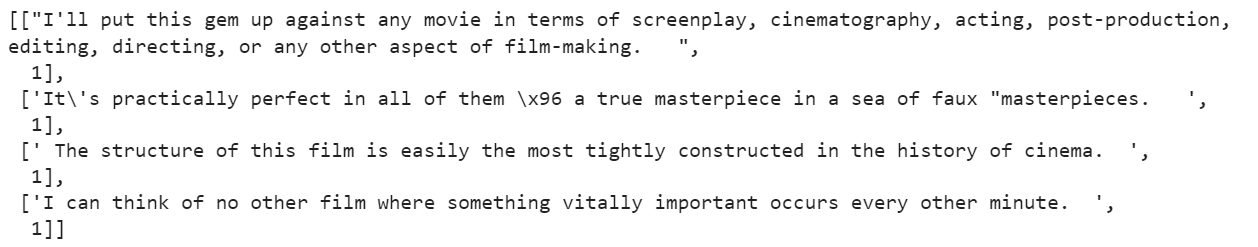

Transformemos en data frame la lista recién generada de los comentarios (review) y evaluaciones (label) del conjunto de evaluaciones de películas IMBD:

In [212]:
dfii = pd.DataFrame(newdfi, columns=['review','label'])

dfii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [213]:
# y concatenamos los tres conjuntos para tener finalmente los 3000 registros:

df = pd.concat([dfa, dfii, dfy], ignore_index=True)   # Tienes que usar el "ignore_index", de lo contrario reincia cada
                                                      # vez de 0 a 999 los índices.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


La salida esperada anterior debe ser semajante a los siguiente:

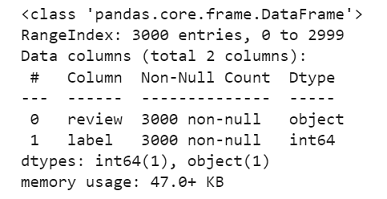

In [214]:
df['label'].value_counts()   # Recordemos que tenemos un 50% de comentarios positivos y de negativos.

,count
label,
0,1500
1,1500


In [215]:
df.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


##**Pregunta - 3:**

Sabemos que existen comentarios muy diversos. Por ejemplo, observa los registros 1125 y 1788, cuyas salidas deben de ser 10/10. De los 3000, dos de los comentarios fueron simplemente de esta forma.

Cuando apliques el proceso de limpieza en la pregunta 4, como solo consideraremos caracteres alfabéticos, estos dos registros quedarán vacíos.

En particular ¿cómo tratarías estos dos comentarios? ¿Simplemente los descartarías? ¿Los incluirías haciendo algún ajuste particular? ¿Alguna otra decisión que consideres adecuada para estos dos casos?

**Incluye a continuación tus comentarios sobre la decisión que tomarías para el tratamiento en particular de estos dos registros, 1125 y 1788. Justifica tu respuesta.**

In [216]:
df.iloc[1788,:]   # verificando tu salida

,1788
review,10/10
label,1


########################################################
##### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 3:**


Para los registros que contienen únicamente la cadena `10/10`, lo más conveniente sería descartarlos, ya que el análisis es de tipo textual y se enfoca en la limpieza y transformación de caracteres alfabéticos, eliminando aquellos que no lo sean.

Sin embargo, si la calificación `10/10` llegase a tener un valor significativo en el contexto del estudio por su frecuencia de aparición, podría considerarse su inclusión cuando la cantidad de comentarios influya en la distribución de los datos.

Como alternativa, se podría sustituir la cadena por un mensaje que indique que el comentario está vacío al tratarse de un campo numérico, aunque representa una evaluación positiva.

##### **FIN PARA AGREGAR TUS COMENTARIOS**
#########################################################

In [217]:
 # Separamos la información:
 #     La "X" serán los datos de entrada, los comentarios.
 #     La "Y" será la variable de salida, la evaluación.
 # Ambos, X y Y son "Series"

X = df.review     # Serie de strings
Y = df.label      # Serie de enteros 0s y 1s

assert X.shape == (3000,)           # verificando que tenemos la dimensiones esperadas.
assert Y.shape == (3000,)

##**Pregunta - 4:**

**En esta etapa deberás llevar a cabo el procesamiento, limpieza y tokenización de los comentarios de texto.**

Deberás de incluir los procesos que se indicarán a continuación, aunque no necesariament deben ser en este orden. De hecho deberás estar revisando la salida de algunos de los registros para que determines cual consideras podría ser el mejor orden de estos pasos.

La incluiremos en una función llamada "clean_tok()" ya que es la tokenización y limpieza básica de cada uno de los 3000 comentarios. La entrada de esta función son cada uno de estos 3000 strings/comentarios.

Lo que nos regresa "clean_tok()" es una lista de tokens/strings ya simplificados de cada comentario de entrada.

Los pasos a incluir son los siguientes (repito, tú deberás determinar el orden de ellos, aquí se incluyen en orden alfabético):

*   **Caracteres alfabéticos:** Solo considerar caracteres alfabéticos. Por lo tanto, deberán ser eliminados signos de puntuación, caracteres especiales y números.

*   **Longitud mayor a 1:** Se deben considerar solamente tokens de longitud mayor a 1.

*   **Minúsculas:** Simplificar todo a minúsculas.

*   **Stopwords:** Eliminar las stopwords.

*   **Tokenización:** Cada comentario queda tokenizado por palabras, o cadena de caracteres alfabéticos.

Por ejemplo, si el primer comentario de X fuera el string 'All you need is love!', lo que nos regresaría clean_tok() sería la lista de strings ['need', 'love'] que llamaremos "tokens".

In [218]:
def clean_tok(doc):
  ##############################################################################
  # AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 4:

  """
- Se convierten las palabras a minúsculas.
- Se eliminan los caracteres no alfabéticos, excepto los apóstrofes,
  ya que el diccionario mystopwords los contiene.
- Se eliminan las stopwords utilizando el conjunto definido en mystopwords.
- Se aplica la biblioteca contractions para expandir las palabras con
  contracciones a su forma completa.
- Se separan nuevamente las palabras por espacios en caso de que la expansión
  de contracciones haya generado nuevos términos.
- Se filtran los tokens para conservar únicamente aquellos con una longitud mayor a 1 carácter.
  """
  import contractions

  tokens = doc.lower()
  tokens = re.sub(r"[^a-z']", " ", tokens).split()
  tokens = [cadena for cadena in tokens if cadena not in mystopwords]
  tokens = [contractions.fix(palabra) for palabra in tokens]
  tokens = " ".join(tokens).split()
  tokens = [cadena for cadena in tokens if len(cadena) > 1]


  # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
  ##############################################################################

  return tokens

In [219]:
# Aplicamos el proceso de limpieza y tokenización:

Xcleantok = [clean_tok(x) for x in X]

Veamos los primeros comentarios.

En particular observa si "minutes" y "major" están como dos tokens separados en el cuarto comentario. De nos ser así, si aparecen juntos como un solo token, debes revisar tu proceso de limpieza anterior, porque esto significa que pueden existir otros muchos casos que nos llevan a esta salida no deseada. Trata de determinar el origen de este problema (y solo en caso de que te haya aparecido como un solo token "minutesmajor", en el cuarto comentario).


In [220]:
for x in Xcleantok[0:5]:
  print(x)

['no', 'way', 'plug', 'us', 'unless', 'go', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'jawbone']
['tied', 'charger', 'conversations', 'lasting', 'minutes', 'major', 'problems']
['mic', 'great']


##**Pregunta - 5:**

Esta pregunta es abierta y podrás incluir todos aquellos procesos de limpieza adicionales que desees.

Por ejemplo, puedes decidir aplicar algunos procesos (regex) para simplificar caracteres que aparecen repetidos más de dos veces, o bien simplificar algunas conjugaciones de verbos regulares para no incluir terminaciones en "s", "ed" o "ing". Puedes también decidir aplicar alguna de las técnicas de stemming o de lemmatization, etc.

NOTA: Deberás aplicar al menos dos procesos de limpieza o normalización adicionales en esta función que llamamos simplemente clean_doc().

La entrada son cada una de las listas con los comentarios tokenizados de Xcleantok y la salida es una lista de tokens simplficados/normalizados con el nombre de "tokens". En dado caso, algunos de los comentarios tokenizados pudieran no surgir cambio alguno bajo esta función.

Recuerda que el objetivo de esta función "clean_doc()" es tener datos más limpios para el proceso de entrenamiento con los algoritmos de aprendizaje automático que se realizarán en las últimas preguntas.

Puedes inspeccionar de manera aleatoria algunos de los 3000 registros para determinar qué procesos de limpieza adicionales incluir.

In [221]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 5:

# Aquí puedes incluir las librerías, paquetes o líneas de código necesarias para
# el proceso de limpieza adicional de esta pregunta:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

"""
- Se filtran caracteres repetidos.
- Se aplica la lematización en tres pasos:
  Primero como verbo,
  Luego como sustantivo y
  Finalmente como adjetivo.
- El objetivo es reducir cada palabra a su forma base según su posible función gramatical.
"""

def clean_doc(doc):

  lemmatizer = WordNetLemmatizer()
  repetidas = re.compile(r'(.)\1{2,}')

  tokens = [lemmatizer.lemmatize(
            lemmatizer.lemmatize(
            lemmatizer.lemmatize(repetidas.sub(r'\1', palabra),
            pos='v'),
            pos='n'),
            pos='a')
            for palabra in doc if palabra ]

  return tokens
  # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
  ##############################################################################

In [222]:
Xclean = [clean_doc(x) for x in Xcleantok]

In [223]:
Xclean[0:5]         # Veamos los primero registros para ver cómo va quedando el resultado.

[['no', 'way', 'plug', 'u', 'unless', 'go', 'converter'],
 ['good', 'case', 'excellent', 'value'],
 ['great', 'jawbone'],
 ['tie', 'charger', 'conversation', 'last', 'minute', 'major', 'problem'],
 ['mic', 'great']]

##**Pregunta - 6:**

En esta pregunta deberás generar la nube de palabras de cada clase: la de los comentarios positivos y la de los comentarios negativos.

En la primera parte de esta pregunta y a partir del conjunto de comentarios obtenido hasta ahora, Xclean, deberás obtener el string de comentarios positivos llamada "pt" y el de comentarios negativos "nt".

En la parte 2 deberás mostrar las dos nubes de palabras: la nube de palabras de los comentarios positivos y la nube de palabras de los comentarios negativos.

En la parte 3 de este ejercicio deberás incluir tus comentarios de lo que observas de ambas nubes de palabras.

Igualmente deberás incluir los paquetes o librerías necesarios.

In [224]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 6 - parte 1:

pt = " ".join([" ".join(comentario) for comentario, etiqueta in zip(Xclean, df['label']) if etiqueta == 1])
nt = " ".join([" ".join(comentario) for comentario, etiqueta in zip(Xclean, df['label']) if etiqueta == 0])

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

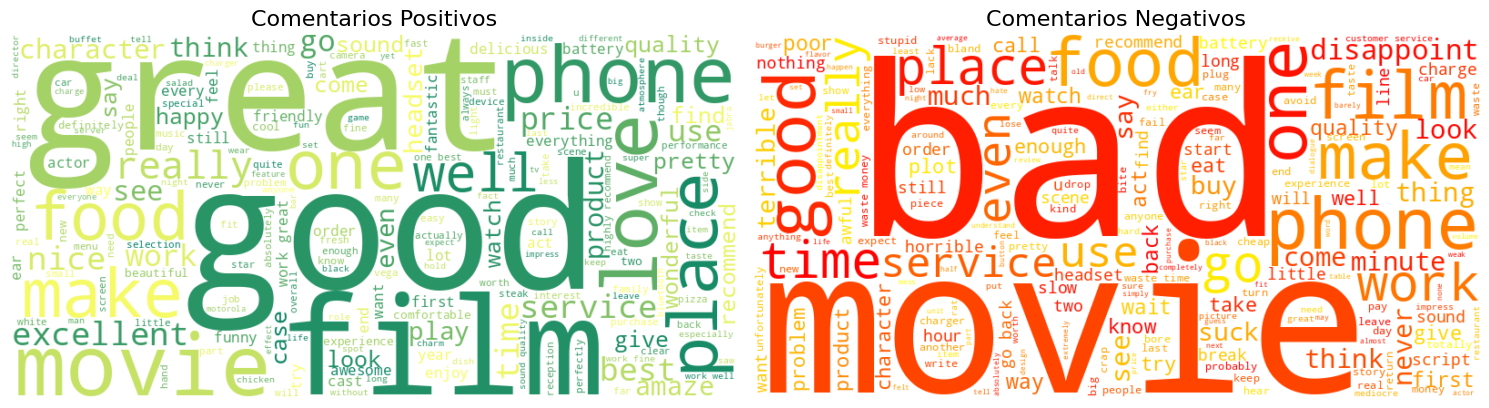

In [225]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 6 - parte 2:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generar_nube_conjunta(texto1, titulo1, color1, texto2, titulo2, color2):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # Crear una figura con 2 subgráficos

    # Nube de palabras del primer texto
    wc1 = WordCloud(width=800, height=400, background_color='white', colormap=color1, prefer_horizontal=0.8).generate(texto1)
    axs[0].imshow(wc1, interpolation='bilinear')
    axs[0].axis("off")
    axs[0].set_title(titulo1, fontsize=16)

    # Nube de palabras del segundo texto
    wc2 = WordCloud(width=800, height=400, background_color='white', colormap=color2, prefer_horizontal=0.8).generate(texto2)
    axs[1].imshow(wc2, interpolation='bilinear')
    axs[1].axis("off")
    axs[1].set_title(titulo2, fontsize=16)

    plt.tight_layout()  # Ajustar el espacio entre gráficos
    plt.show()

# Llamada a la función con ambos conjuntos de comentarios
generar_nube_conjunta(pt, "Comentarios Positivos", "summer_r", nt, "Comentarios Negativos", "autumn_r")

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

######################################################################
###### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 6 - parte 3:**


En la nube de palabras se identifican sustantivos como `phone`, `movie` y `film`, los cuales no aportan información relevante para determinar si un comentario es positivo o negativo. Asimismo, es importante destacar que, en la nube de palabras de los comentarios negativos, aparecen términos como `good`, que, a primera vista, podrían asociarse con opiniones positivas. Sin embargo, eliminar ciertos sustantivos que no aportan información útil podría optimizar el diccionario, mejorando la precisión y el procesamiento del modelo.



###### **FIN PARA AGREGAR TUS COMENTARIOS.**
######################################################################

###**Train-Validation-Test**

Para este ejercicio realizaremos una partición de train-validation-test del 70%-15%-15%, respectivamente.

Obviamente la distribución de esta partición puede ser otro de los hiperparámetros a determinar, pero para fines de este ejercicio consideraremos dichos valores.

In [226]:
from sklearn.model_selection import train_test_split

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)

print('X,y Train:', len(x_train), len(y_train))      # los "x_" son "list" y los "y_" son "Series"
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


###Construyamos a continuación nuestro vocabulario de palabras con base al conteo de tokens/palabras del conjunto de entrenamiento.

In [227]:
from collections import Counter

In [228]:
midiccionario = Counter()

for k in range(len(x_train)):
  midiccionario.update(x_train[k])


print('Longitud del diccionario:', len(midiccionario))
print('\n(word,frequency):')
print(midiccionario.most_common(10))

Longitud del diccionario: 3278

(word,frequency):
[('not', 405), ('good', 202), ('great', 141), ('movie', 140), ('phone', 132), ('film', 127), ('do', 118), ('work', 113), ('bad', 113), ('like', 101)]


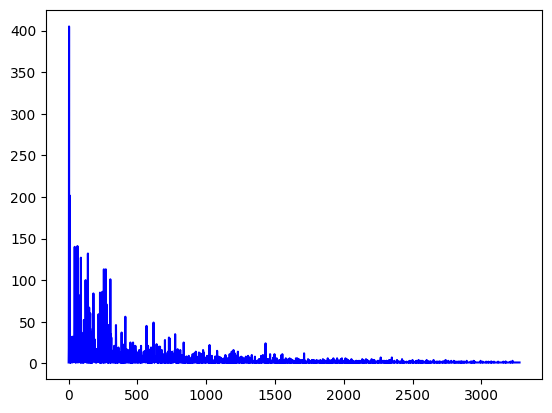

In [229]:
# Veamos la gráfica de palabras nuestro diccionario con base a la frecuencia de las palabras/tokens:
plt.plot(list(np.arange(len(midiccionario))), list(midiccionario.values()), color='blue')
plt.show()

###Descartemos palabras cuya frecuencia en el conjunto de entrenamiento es muy pequeña:

##**Pregunta - 7:**

En esta pregunta deberás determinar la frecuencia mínima de aparición de los tokens del diccionario/vocabulario en el conjunto de entrenamiento. Es usual que al menos se filtren los tokens de frecuencia 1, ya que usualmente no dan mayor información.

Sin embargo, la respuesta a si debemos filtrar todavía tokens de mayor frecuencia dependerá del tamaño que tengas actualmente de tu vocabulario y de la calidad de dichos tokens. Una manera de determinar dicha calidad de los tokens es con el resultado de los modelos de aprendizaje (regresión logística, random-forest, etc.) que aplicarás en los ejercicios de la última parte de esta Actividad.

Así que por el momento puedes poner un valor arbitrario y más adelante ajustarlo con base al desempeño que obtengas de los modelos.

Sin embargo, debes cuidar que la frecuencia de los tokens no la consideres demasiado grande, que empieces a generar una gran cantidad de comentarios vacíos en tu conjunto de entrenamiento.

Llamaremos "min_freq" a la frecuencia mínima de aparición de un token para considerarlo dentro del vocabulario/diccionario. Debe ser un número entero.

Llamaremos "midicc" al nuevo diccionario que generes con tokens de frecuencia natural (es decir, de conteo) mayor o igual a "min_freq".

In [230]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 7:

min_freq = 3
midicc = {
    elemento: frecuencia
    for elemento, frecuencia in midiccionario.items()
    if frecuencia >= min_freq
    }

midicc = dict(sorted(midicc.items(), key=lambda x: x[1], reverse=True))

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

print('Nueva longitud del nuevo vocabulario:', len(midicc))
print(list(midicc.items())[0:5])     # veamos algunos elementos del diccionario.

Nueva longitud del nuevo vocabulario: 526
[('not', 405), ('good', 202), ('great', 141), ('movie', 140), ('phone', 132)]


###Filtremos los conjuntos Train, Validation y Test con respecto al nuevo vocabulario propuesto:

In [231]:
train_x = []
for ss in x_train:
  train_x.append([w for w in ss if w in midicc])

val_x = []
for ss in x_val:
  val_x.append([w for w in ss if w in midicc])

test_x = []
for ss in x_test:
  test_x.append([w for w in ss if w in midicc])

In [232]:
# Podemos ver algunos de los comentarios de entrenamiento, antes y después
# de incluir la condición de la frecuencia mínima de ocurrencia de un token:

for k in range(3):
  print('Antes:', x_train[k])
  print('Después:', train_x[k])

Antes: ['co', 'star', 'do', 'not', 'fare', 'much', 'good', 'people', 'like', 'morgan', 'freeman', 'jonah', 'hill', 'ed', 'helm', 'waste']
Después: ['star', 'do', 'not', 'much', 'good', 'people', 'like', 'waste']
Antes: ['tonight', 'elk', 'filet', 'special', 'suck']
Después: ['special', 'suck']
Antes: ['pay', 'bill', 'not', 'tip', 'felt', 'server', 'terrible', 'job']
Después: ['pay', 'not', 'tip', 'felt', 'server', 'terrible', 'job']


###Obtengamos las matrices de conteo document-term-matrix como matrices dispersas (sparse matrices ). Para ello requerimos que cada comentario esté como un solo string.

In [233]:
train_x_docs = []
for k in range(len(train_x)):
  train_x_docs.append(' '.join(train_x[k]))

val_x_docs = []
for k in range(len(val_x)):
  val_x_docs.append(' '.join(val_x[k]))

test_x_docs = []
for k in range(len(test_x)):
  test_x_docs.append(' '.join(test_x[k]))



# Verifica que los primeros comentarios de Train están cada uno como un solo string:
for k in range(3):
  print(train_x_docs[k])

star do not much good people like waste
special suck
pay not tip felt server terrible job


###Ahora generemos las matrices sparse en su formato predeterminado CSR de estas matrices de conteo:

In [234]:
mivocab = list(midicc.keys())     # Obtenemos nuestro vocabulario de tokens/palabras.

#mivocab.sort()    # Usualmente se ordenan alfabéticamente, pero para visualizar algunos de los valores
                   # no cero de las matrices, por el momento no lo haremos.



# Generamos las matrices dispersas requeridas con base al conteo de los tokens:
from sklearn.feature_extraction.text import CountVectorizer

countvectorizer = CountVectorizer(vocabulary=mivocab)
train_x_count = countvectorizer.fit_transform(train_x_docs)
val_x_count = countvectorizer.transform(val_x_docs)
test_x_count = countvectorizer.transform(test_x_docs)

count_tokens = countvectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = train_x_count.toarray(),  columns = count_tokens)
print(df_countvect.iloc[0:3,6:18])   # veamos las frecuencias de los primeros comentarios.

   do  work  bad  like  time  one  go  place  service  get  food  make
0   1     0    0     1     0    0   0      0        0    0     0     0
1   0     0    0     0     0    0   0      0        0    0     0     0
2   0     0    0     0     0    0   0      0        0    0     0     0


In [235]:
p_sparse = 1 - train_x_count.count_nonzero() / (train_x_count.shape[0] * train_x_count.shape[1])    # Sparsity : Porcentaje de valores de 0.
print('Porcentaje de valores cero de la matriz sparse de entrenamiento: %.1f%%' % (100*p_sparse))

Porcentaje de valores cero de la matriz sparse de entrenamiento: 99.2%


##**Pregunta - 8:**

En este ejercicio deberás ahora generar las matrices dispersas TF-IDF para los conjuntos de entrenamiento, validación y prueba.

Deberás usar el vocabulario "mivocab" para generar dichas matrices.

Dichas matrices las llamaremos "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".

Deberás agregar además las librerías o módulos necesarios.

Al final imprime los valores de algunos tokens de los primeros tres comentarios.

In [236]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 8:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(vocabulary=mivocab)

train_x_tfidf = vectorizer.fit_transform(train_x_docs)
val_x_tfidf = vectorizer.transform(val_x_docs)
test_x_tfidf = vectorizer.transform(test_x_docs)

print("\n🔹 TF-IDF de los primeros 3 comentarios (Train):")
print(train_x_tfidf[:3].toarray())
print("\n🔹 TF-IDF de los primeros 3 comentarios (Validación):")
print(val_x_tfidf[:3].toarray())
print("\n🔹 TF-IDF de los primeros 3 comentarios (Test):")
print(test_x_tfidf[:3].toarray())

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################


🔹 TF-IDF de los primeros 3 comentarios (Train):
[[0.21220116 0.26292452 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.17864832 0.         0.         ... 0.         0.         0.        ]]

🔹 TF-IDF de los primeros 3 comentarios (Validación):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

🔹 TF-IDF de los primeros 3 comentarios (Test):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##**Pregunta - 9:**

###A continuación, usando Sklearn, deberás aplicar los modelos de regresión logística (lo llamaremos modeloLRcount), ranfom-forest para clasificación (lo llamaremos modeloRFcount) y naive-bayes en su opción MultinomialNB (lo llamaremos modeloNBcount).

###Deberás de utilizar las matrices de conteo "train_x_count", "val_x_count" y "test_x_count".

###Con el mejor modelo obtenido, se usará el conjunto de prueba (test) para obtener el desempeño (Accuracy) final y su matriz de confusión.

###Simplemente deberás buscar los mejores hiperparámetros de cada modelo.

###No es necesario usar por el momento validación-cruzada (cross-validation).

###Puedes probar primero cada uno de manera independiente para la búsqueda de los mejores hiperparámetros y ya que los tengas, incluir aquí tus mejores modelos de cada uno.

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [238]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 9:

modeloLRcount = LogisticRegression(max_iter=800,C=.2)
modeloLRcount.fit(train_x_count, y_train)
accuracy_LR = modeloLRcount.score(val_x_count, y_val)

modeloRFcount = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
modeloRFcount.fit(train_x_count, y_train)
accuracy_RF = modeloRFcount.score(val_x_count, y_val)

modeloNBcount = MultinomialNB(alpha=0.5)
modeloNBcount.fit(train_x_count, y_train)
accuracy_NB = modeloNBcount.score(val_x_count, y_val)


# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################


print('LR: Train-accuracy: %.2f%%' % (100*modeloLRcount.score(train_x_count, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRcount.score(val_x_count, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFcount.score(train_x_count, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFcount.score(val_x_count, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBcount.score(train_x_count, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBcount.score(val_x_count, y_val)))

LR: Train-accuracy: 86.43%
LR: Val-accuracy: 81%

RF: Train-accuracy: 87.52%
RF: Val-accuracy: 80.22%

NB: Train-accuracy: 86.24%
NB: Val-accuracy: 80.89%


In [239]:
##############################################################################
# AGREGA AQUÍ EL NOMBRE DE TU MEJOR MODELO OBTENIDO CON COUNTER:

modelos = {
    accuracy_LR: modeloLRcount,
    accuracy_RF: modeloRFcount,
    accuracy_NB: modeloNBcount
}

print(f"--"*40)
print("Resultados obtenidos")
print(f"--"*40)
for accuracy, modelo in modelos.items():
    print(f"Accuracy: \033[32m\033[1m{accuracy:.2f}\033[0m → Modelo: {modelo}")
print(f"--"*40)

mejor_accuracy = max(modelos.keys())
mejor_modelo = modelos[mejor_accuracy]
print(f"Mejor modelo → \033[36m{mejor_modelo}\033[0m : \033[32m\033[1m{mejor_accuracy*100:.2f}\033[0m%")
print(f"--"*40)

mejor_modelo_Count = mejor_modelo # incluye el nombre, modeloXXcount, de tu mejor modelo.

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################



print('Test-accuracy con el mejor modelo de Conteo %.2f%%' % (100*mejor_modelo_Count.score(test_x_count, y_test)))

from sklearn.metrics import confusion_matrix

pred = mejor_modelo_Count.predict(test_x_count)
print('\nMatriz de confusión con el mejor modelo de Conteo:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión con el mejor modelo de Conteo en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

--------------------------------------------------------------------------------
Resultados obtenidos
--------------------------------------------------------------------------------
Accuracy: 0.81 → Modelo: MultinomialNB(alpha=0.5)
Accuracy: 0.80 → Modelo: RandomForestClassifier(max_depth=20, random_state=42)
--------------------------------------------------------------------------------
Mejor modelo → MultinomialNB(alpha=0.5) : 80.89%
--------------------------------------------------------------------------------
Test-accuracy con el mejor modelo de Conteo 79.11%

Matriz de confusión con el mejor modelo de Conteo:
[[177  39]
 [ 55 179]]

Matriz de confusión con el mejor modelo de Conteo en proporciones:
[[0.39333333 0.08666667]
 [0.12222222 0.39777778]]


##**Pregunta - 10:**

###Deberás repetir el ejercicio anterior, pero usando ahora las matrices TF-IDF obtenidas previamente: "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".

###Llamaremos a los modelos modeloXXtfidf, para LR, RF y NB.

In [240]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 10:

modeloLRtfidf = LogisticRegression(max_iter=800,C=.2)
modeloLRtfidf.fit(train_x_tfidf, y_train)
accuracy_LRtfidf = modeloLRtfidf.score(val_x_tfidf, y_val)

modeloRFtfidf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
modeloRFtfidf.fit(train_x_tfidf, y_train)
accuracy_RFtfidf = modeloRFtfidf.score(val_x_tfidf, y_val)

modeloNBtfidf = MultinomialNB(alpha=5)
modeloNBtfidf.fit(train_x_tfidf, y_train)
accuracy_NBtfidf = modeloNBtfidf.score(val_x_tfidf, y_val)

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################


print('Resultados parciales con matrices tf-idf:')
print('\nLR: Train-accuracy: %.2f%%' % (100*modeloLRtfidf.score(train_x_tfidf, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRtfidf.score(val_x_tfidf, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFtfidf.score(train_x_tfidf, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFtfidf.score(val_x_tfidf, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBtfidf.score(train_x_tfidf, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBtfidf.score(val_x_tfidf, y_val)))

Resultados parciales con matrices tf-idf:

LR: Train-accuracy: 86.00%
LR: Val-accuracy: 82%

RF: Train-accuracy: 88.24%
RF: Val-accuracy: 80.67%

NB: Train-accuracy: 85.67%
NB: Val-accuracy: 80.89%


In [241]:
##############################################################################
# AGREGA AQUÍ EL NOMBRE DE TU MEJOR MODELO OBTENIDO CON TF-IDF:
modelostfidf = {
    accuracy_LRtfidf: modeloLRtfidf,
    accuracy_RFtfidf: modeloRFtfidf,
    accuracy_NBtfidf: modeloNBtfidf
}

print(f"--"*40)
print("Resultados obtenidos")
print(f"--"*40)
for accuracy, modelo in modelostfidf.items():
    print(f"Accuracy: \033[32m\033[1m{accuracy:.2f}\033[0m → Modelo: {modelo}")
print(f"--"*40)

mejor_accuracy = max(modelostfidf.keys())
mejor_modelo = modelostfidf[mejor_accuracy]
print(f"Mejor modelo → \033[36m{mejor_modelo}\033[0m : \033[32m\033[1m{mejor_accuracy*100:.2f}\033[0m%")
print(f"--"*40)

mejor_modelo_Tfidf = mejor_modelo # incluye el nombre, modeloXXtfidf, de tu mejor modelo.

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################



print('Test-accuracy con el mejor modelo Tf-idf %.2f%%' % (100*mejor_modelo_Tfidf.score(test_x_tfidf, y_test)))

pred = mejor_modelo_Tfidf.predict(test_x_tfidf)
print('\nMatriz de confusión con el mejor modelo Tf-idf:')
print(confusion_matrix(y_test, pred, labels=[0,1]))

print('\nMatriz de confusión con el mejor modelo de Tf-idf en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0,1]) / pred.shape[0])

--------------------------------------------------------------------------------
Resultados obtenidos
--------------------------------------------------------------------------------
Accuracy: 0.82 → Modelo: LogisticRegression(C=0.2, max_iter=800)
Accuracy: 0.81 → Modelo: RandomForestClassifier(max_depth=20, random_state=42)
Accuracy: 0.81 → Modelo: MultinomialNB(alpha=5)
--------------------------------------------------------------------------------
Mejor modelo → LogisticRegression(C=0.2, max_iter=800) : 82.22%
--------------------------------------------------------------------------------
Test-accuracy con el mejor modelo Tf-idf 78.22%

Matriz de confusión con el mejor modelo Tf-idf:
[[174  42]
 [ 56 178]]

Matriz de confusión con el mejor modelo de Tf-idf en proporciones:
[[0.38666667 0.09333333]
 [0.12444444 0.39555556]]


##**Pregunta - 11:**

###Finalmente incluye tus conclusiones finales de la Actividad.

###En particular, indica cuál técnica resultó mejor en este problema, ¿usando matrices de conteo o tf-idf?

###Indica también a qué crees que se debe la diferencia entre los valores de los Falsos-Negativos y Falsos-Positivos de la mejor matriz de confusión que obtuviste. ¿Qué implicaciones podrían tener cada uno de estos errores?

##**Como nota complementaria, se esperaría que tu mejor modelo final mínimamente debiera alcanzar un 72% de buen desempeño (accuracy), pero puede ser mayor.**

######################################################################
###### **AGREGA AQUÍ TUS CONCLUSIONES FINALES - Pregunta 11:**

Tras aplicar los modelos con cada técnica, se obtuvieron estos resultados.

<table>
  <tr>
    <th>Métrica</th>
    <th>Matrices de Conteo</th>
    <th>TF-IDF</th>
  </tr>
  <tr>
    <td>Accuracy en validación</td>
    <td>80.89%</td>
    <td><strong>82.22%</strong></td>
  </tr>
  <tr>
    <td>Test accuracy</td>
    <td><strong>79.11%</strong></td>
    <td>78.22</td>
  </tr>
  <tr>
    <td>Verdaderos positivos (VP)</td>
    <td><strong>179</strong></td>
    <td>178</td>
  </tr>
  <tr>
    <td>Verdaderos negativos (VN)</td>
    <td><strong>177</strong></td>
    <td>174</td>
  </tr>
  <tr>
    <td>Falsos positivos (FP)</td>
    <td>39</td>
    <td><strong>42</strong></td>
  </tr>
  <tr>
    <td>Falsos negativos (FN)</td>
    <td>55</td>
    <td><strong>56</strong></td>
  </tr>
</table>

Estos resultados sugieren que, durante el entrenamiento, **TF-IDF** mostró un mejor desempeño. Sin embargo, al realizar predicciones con el conjunto de prueba, las matrices de conteo mostraron un rendimiento ligeramente superior(accuracy de 79.11%). En las matrices de confusión, se observa que estas predicciones presentaron menos errores de clasificación en términos de falsos positivos y falsos negativos. Por ello, aun que las diferencias son muy pequeñas, las **matrices de conteo** ofrecieron resultados más confiables.

La diferencia entre los valores de falsos negativos (FN) y falsos positivos (FP) podría estar relacionada con la naturaleza de los datos, donde algunas características no son fácilmente identificables por los modelos. Por ejemplo, hay palabras que, aunque parecen tener una connotación positiva, pueden formar parte de comentarios negativos dependiendo del contexto. En este escenario, una clasificación incorrecta puede afectar la percepción que se tiene de un producto, servicio o, como en este caso, de una película, dado el origen del conjunto de datos utilizado.


Se esperaba que TF-IDF tuviera un mejor desempeño, ya que esta técnica no solo considera la frecuencia de aparición de una palabra en un documento, sino también su relevancia dentro del corpus, lo que permite reducir el peso de términos comunes. En la nube de palabras para los comentarios negativos, se observaron términos como *quality* o *good*, que, por sí solos, pueden sugerir un comentario positivo. Sin embargo, en combinación con otras palabras, pueden formar comentarios negativos. Esto sugiere que un enfoque distinto en la limpieza y el preprocesamiento de los datos podría mejorar el rendimiento de los modelos.



<table>
  <tr>
    <th>Modelo</th>
    <th>Train-MC</th>
    <th>Val-MC</th>
    <th>Dif</th>
    <th>Train-TFIDF</th>
    <th>Val-TFIDF</th>
    <th>Dif</th>
  </tr>
  <tr>
    <td>LR</td>
    <td><strong>86.43%</strong></td>
    <td>81%</td>
    <td>5.43%</td>
    <td>86.00%</td>
    <td><strong>82%</strong></td>  
    <td>4%</td>  
  </tr>
  <tr>
    <td>RF</td>
    <td>87.52%</td>
    <td>80.22%</td>
    <td>7.3%</td>
    <td><strong>88.24%</strong></td>
    <td><strong>80.67%</strong></td>
    <td>7.57%</td>
  </tr>
  <tr>
    <td>NB</td>
    <td><strong>86.24%</strong></td>
    <td>80.89%</td>
    <td>5.35%</td>
    <td>85.67%</td>
    <td>80.89%</td>
    <td>4.78</td>
  </tr>
</table>

Por último, al comparar el desempeño de los distintos modelos, se observa una diferencia moderada entre las precisiones de entrenamiento y validación. Esto sugiere un posible overfitting en el modelo de Random Forest, ya que presenta una brecha más amplia. En cambio, los modelos de Logistic Regression y Naive Bayes muestran diferencias más pequeñas, entre 4 y 5.5 puntos porcentuales, lo cual aún se considera aceptable.

###### **FIN PARA AGREGAR TUS CONCLUSIONES FINALES.**
######################################################################

#**FIN DE LA ACTIVIDAD DE LAS SEMANAS 3 Y 4**